In [ ]:

!pip install dataprep

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation
%matplotlib inline
pd.set_option('display.max_columns', 500)
import plotly.express as px

from sklearn.cluster import KMeans

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv('top_spotify_songs.csv')
df.head()

spotify_id                                 name  \
0  2HafqoJbgXdtjwCOvNEF14                          Si No Estás   
1  7x9aauaA9cu6tyfpHnqDLo  Seven (feat. Latto) (Explicit Ver.)   
2  3rUGC1vUpkDG9CZFHMur1t                               greedy   
3  4MjDJD8cW7iVeWInc2Bdyj                               MONACO   
4  7iQXYTyuG13aoeHxGG28Nh                          PERRO NEGRO   

            artists  daily_rank  daily_movement  weekly_movement country  \
0    iñigo quintero           1               0                3     NaN   
1  Jung Kook, Latto           2               4                0     NaN   
2        Tate McRae           3              -1                2     NaN   
3         Bad Bunny           4              -1               -3     NaN   
4   Bad Bunny, Feid           5               0                1     NaN   

  snapshot_date  popularity  is_explicit  duration_ms  \
0    2023-10-27          97        False       184061   
1    2023-10-27          97         True       184400   
2    2023-10-27          99         True       131872   
3    2023-10-27          96         True       267194   
4    2023-10-27          94         True       162767   

                            album_name album_release_date  danceability  \
0                          Si No Estás         2022-09-23         0.537   
1                  Seven (feat. Latto)         2023-07-14         0.802   
2                               greedy         2023-09-15         0.750   
3  nadie sabe lo que va a pasar mañana         2023-10-13         0.787   
4  nadie sabe lo que va a pasar mañana         2023-10-13         0.911   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.421    5    -8.720     1       0.0285        0.8270          0.000000   
1   0.832   11    -4.107     1       0.0434        0.3110          0.000000   
2   0.733    6    -3.180     0       0.0319        0.2560          0.000000   
3   0.621    4    -5.009     0       0.0680        0.1500          0.000402   
4   0.778    5    -2.248     1       0.2620        0.0887          0.000022   

   liveness  valence    tempo  time_signature  
0    0.1380    0.524   98.224               4  
1    0.0815    0.890  124.997               4  
2    0.1140    0.844  111.018               1  
3    0.5800    0.130  139.056               4  
4    0.1790    0.345   96.057               4

In [ ]:
num_rows = len(df)
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 36523


In [ ]:
# Filter rows based on values in the 'country' column
selected_countries = ['US', 'CA', 'IN', 'MX','AU','NZ','GB']
filtered_df = df[df['country'].isin(selected_countries)]
filtered_df.head()

spotify_id                                           name  \
260  2YSzYUF3jWqb9YP9VXmpjE                             IDGAF (feat. Yeat)   
261  4MjDJD8cW7iVeWInc2Bdyj                                         MONACO   
262  3vkCueOmm7xQDoJ17W1Pm3                          My Love Mine All Mine   
263  1BxfuPKGuaTgP7aM0Bbdwr                                   Cruel Summer   
264  4KULAymBBJcPRpk1yO4dOG  I Remember Everything (feat. Kacey Musgraves)   

                         artists  daily_rank  daily_movement  weekly_movement  \
260                  Drake, Yeat           1               0                0   
261                    Bad Bunny           2               1                0   
262                       Mitski           3              -1                0   
263                 Taylor Swift           4               0                3   
264  Zach Bryan, Kacey Musgraves           5               1               -1   

    country snapshot_date  popularity  is_explicit  duration_ms  \
260      US    2023-10-27          93         True       260111   
261      US    2023-10-27          96         True       267194   
262      US    2023-10-27          96        False       137773   
263      US    2023-10-27         100        False       178426   
264      US    2023-10-27          94        False       227195   

                                 album_name album_release_date  danceability  \
260                        For All The Dogs         2023-10-06         0.663   
261     nadie sabe lo que va a pasar mañana         2023-10-13         0.787   
262  The Land Is Inhospitable and So Are We         2023-09-15         0.504   
263                                   Lover         2019-08-23         0.552   
264                              Zach Bryan         2023-08-25         0.429   

     energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
260   0.670    8    -8.399     1       0.2710        0.0464          0.000089   
261   0.621    4    -5.009     0       0.0680        0.1500          0.000402   
262   0.308    9   -14.958     1       0.0321        0.8680          0.135000   
263   0.702    9    -5.707     1       0.1570        0.1170          0.000021   
264   0.453    0    -7.746     1       0.0459        0.5540          0.000002   

     liveness  valence    tempo  time_signature  
260     0.205    0.138  136.952               4  
261     0.580    0.130  139.056               4  
262     0.158    0.121  113.950               4  
263     0.105    0.564  169.994               4  
264     0.102    0.155   77.639               4

In [ ]:
num_rows = len(filtered_df)
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 3511


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3511 entries, 260 to 36372
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          3511 non-null   object 
 1   name                3511 non-null   object 
 2   artists             3511 non-null   object 
 3   daily_rank          3511 non-null   int64  
 4   daily_movement      3511 non-null   int64  
 5   weekly_movement     3511 non-null   int64  
 6   country             3511 non-null   object 
 7   snapshot_date       3511 non-null   object 
 8   popularity          3511 non-null   int64  
 9   is_explicit         3511 non-null   bool   
 10  duration_ms         3511 non-null   int64  
 11  album_name          3511 non-null   object 
 12  album_release_date  3511 non-null   object 
 13  danceability        3511 non-null   float64
 14  energy              3511 non-null   float64
 15  key                 3511 non-null   int64  
 16  lou

In [ ]:
# Fill the null in the country field with 'unknown country'
filtered_df['country'].fillna('unknown country', inplace=True)
filtered_df.head()

spotify_id                                           name  \
260  2YSzYUF3jWqb9YP9VXmpjE                             IDGAF (feat. Yeat)   
261  4MjDJD8cW7iVeWInc2Bdyj                                         MONACO   
262  3vkCueOmm7xQDoJ17W1Pm3                          My Love Mine All Mine   
263  1BxfuPKGuaTgP7aM0Bbdwr                                   Cruel Summer   
264  4KULAymBBJcPRpk1yO4dOG  I Remember Everything (feat. Kacey Musgraves)   

                         artists  daily_rank  daily_movement  weekly_movement  \
260                  Drake, Yeat           1               0                0   
261                    Bad Bunny           2               1                0   
262                       Mitski           3              -1                0   
263                 Taylor Swift           4               0                3   
264  Zach Bryan, Kacey Musgraves           5               1               -1   

    country snapshot_date  popularity  is_explicit  duration_ms  \
260      US    2023-10-27          93         True       260111   
261      US    2023-10-27          96         True       267194   
262      US    2023-10-27          96        False       137773   
263      US    2023-10-27         100        False       178426   
264      US    2023-10-27          94        False       227195   

                                 album_name album_release_date  danceability  \
260                        For All The Dogs         2023-10-06         0.663   
261     nadie sabe lo que va a pasar mañana         2023-10-13         0.787   
262  The Land Is Inhospitable and So Are We         2023-09-15         0.504   
263                                   Lover         2019-08-23         0.552   
264                              Zach Bryan         2023-08-25         0.429   

     energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
260   0.670    8    -8.399     1       0.2710        0.0464          0.000089   
261   0.621    4    -5.009     0       0.0680        0.1500          0.000402   
262   0.308    9   -14.958     1       0.0321        0.8680          0.135000   
263   0.702    9    -5.707     1       0.1570        0.1170          0.000021   
264   0.453    0    -7.746     1       0.0459        0.5540          0.000002   

     liveness  valence    tempo  time_signature  
260     0.205    0.138  136.952               4  
261     0.580    0.130  139.056               4  
262     0.158    0.121  113.950               4  
263     0.105    0.564  169.994               4  
264     0.102    0.155   77.639               4

In [ ]:
# check missing values per column
filtered_df.isna().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [ ]:
# check for duplicates
filtered_df.duplicated().sum()

0

In [ ]:
 #drop and then check missing values per column

filtered_df.dropna(inplace=True)
filtered_df.isna().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [ ]:
categoricals = ['spotify_id','name','artists','country','snapshot_date','is_explicit','album_name','album_release_date']
numericals = ['daily_rank','daily_movement','weekly_movement','popularity','duration_ms','danceability','energy',
              'key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo',
              'time_signature']

In [ ]:
# describe method on categorical data
filtered_df[categoricals].describe().T

count unique                     top  freq
spotify_id          3511    249  2YSzYUF3jWqb9YP9VXmpjE    50
name                3511    246      IDGAF (feat. Yeat)    50
artists             3511    193            Taylor Swift   219
country             3511      7                      US   503
snapshot_date       3511     10              2023-10-27   361
is_explicit         3511      2                   False  2135
album_name          3511    191        For All The Dogs   207
album_release_date  3511    144              2023-10-13   217

In [ ]:
# numerical statistical sumary
filtered_df[numericals].describe().T

count           mean           std            min  \
daily_rank        3511.0      25.563087     14.465124       1.000000   
daily_movement    3511.0       2.617203      9.342875     -36.000000   
weekly_movement   3511.0      15.033039     16.758110     -26.000000   
popularity        3511.0      86.853318      9.219042       0.000000   
duration_ms       3511.0  204860.281971  46206.542275  103264.000000   
danceability      3511.0       0.660576      0.136722       0.271000   
energy            3511.0       0.645391      0.164868       0.091100   
key               3511.0       5.407007      3.619565       0.000000   
loudness          3511.0      -6.616087      2.657221     -17.665000   
mode              3511.0       0.592139      0.491507       0.000000   
speechiness       3511.0       0.092517      0.082719       0.025000   
acousticness      3511.0       0.273589      0.255133       0.000008   
instrumentalness  3511.0       0.009488      0.049815       0.000000   
liveness          3511.0       0.173923      0.121299       0.023200   
valence           3511.0       0.522387      0.238761       0.066700   
tempo             3511.0     122.188554     28.868078      65.203000   
time_signature    3511.0       3.848191      0.462893       1.000000   

                          25%            50%            75%         max  
daily_rank            13.0000      26.000000      38.000000      50.000  
daily_movement         0.0000       0.000000       2.000000      49.000  
weekly_movement        0.0000      10.000000      29.000000      49.000  
popularity            83.0000      88.000000      93.000000     100.000  
duration_ms       173104.0000  201084.000000  231000.000000  586075.000  
danceability           0.5570       0.662000       0.761000       0.974  
energy                 0.5400       0.670000       0.744000       0.978  
key                    2.0000       5.000000       9.000000      11.000  
loudness              -7.7790      -6.169000      -5.176000      -0.210  
mode                   0.0000       1.000000       1.000000       1.000  
speechiness            0.0389       0.057800       0.101000       0.491  
acousticness           0.0684       0.183000       0.440000       0.969  
instrumentalness       0.0000       0.000002       0.000177       0.652  
liveness               0.1010       0.125000       0.205000       0.890  
valence                0.3560       0.519000       0.744000       0.967  
tempo                 97.9940     119.935000     140.098000     203.759  
time_signature         4.0000       4.000000       4.000000       4.000


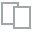
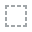
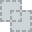
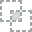
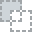
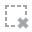
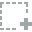
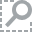
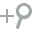
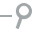
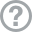
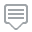
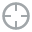
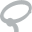
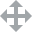
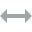
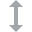
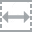
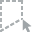
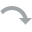
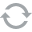
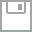
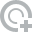
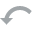
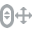
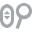
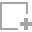
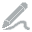
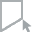
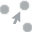
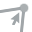
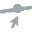

In [ ]:
plot(filtered_df.drop(columns='spotify_id'))

In [ ]:
numericals1 = ['daily_rank','daily_movement','weekly_movement','popularity','duration_ms','danceability','energy',
              'key']
numericals2 = ['loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo',
              'time_signature']

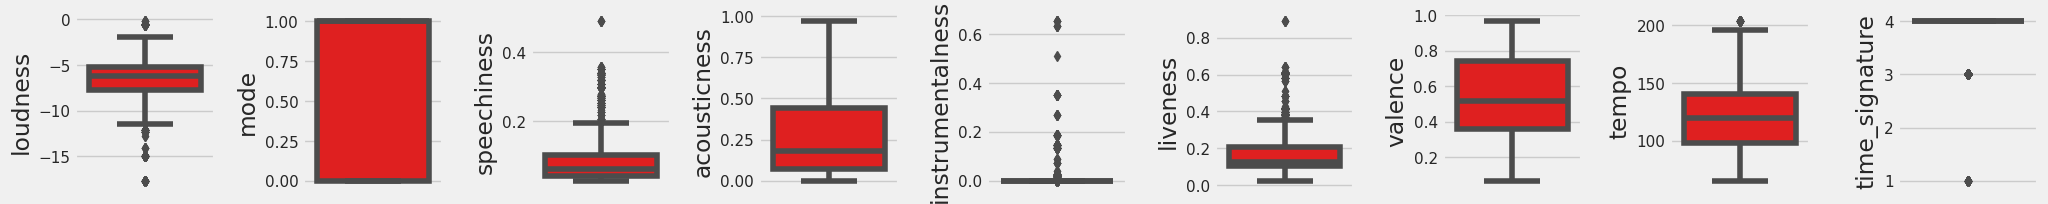

In [ ]:
# plotting
features2 = numericals2
for i in range(0, len(features2)):
    plt.subplot(4, len(features2), i+1)
    sns.boxplot(y=filtered_df[features2[i]], color='red')
    plt.tight_layout()

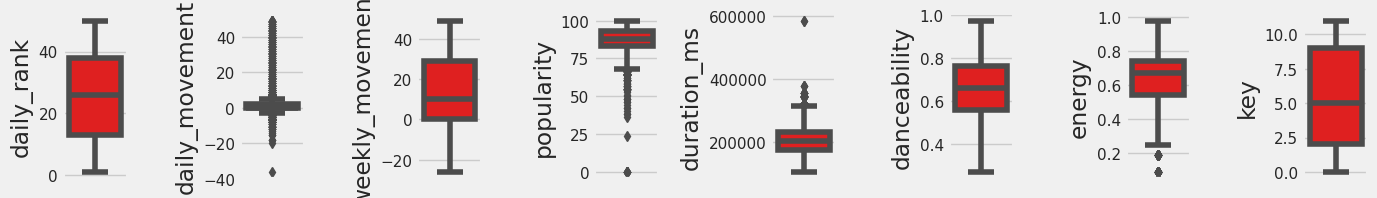

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(14,8))

# plotting
features1 = numericals1
for i in range(0, len(features1)):
    plt.subplot(4, len(features1), i+1)
    sns.boxplot(y=filtered_df[features1[i]], color='red')
    plt.tight_layout()

In [ ]:
# Function to calculate outliers based on IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

In [ ]:
# Calculate the number of outliers for column 'loudness'
outliers_count7 = count_outliers_iqr(filtered_df['valence'])

print(f"Number of outliers: {(outliers_count7/105647)*100}")

Number of outliers: 0.0


In [ ]:
# Calculate the number of outliers for column 'daily_movement'
outliers_count1 = count_outliers_iqr(filtered_df['daily_movement'])

print(f"Number of outliers: {(outliers_count1/105647)*100}")

Number of outliers: 0.6143099188808012


In [ ]:
# Calculate the number of outliers for column 'weekly_movement'
outliers_count2 = count_outliers_iqr(filtered_df['weekly_movement'])

print(f"Number of outliers: {(outliers_count2/105647)*100}")

Number of outliers: 0.0


In [ ]:
# Calculate the number of outliers for column 'popularity'
outliers_count3 = count_outliers_iqr(filtered_df['popularity'])

print(f"Number of outliers: {(outliers_count3/105647)*100}")

Number of outliers: 0.1041203252340341


In [ ]:
# Calculate the number of outliers for column 'duration_ms'
outliers_count4 = count_outliers_iqr(filtered_df['duration_ms'])

print(f"Number of outliers: {(outliers_count4/105647)*100}")

Number of outliers: 0.08802900224331973


In [ ]:
# Calculate the number of outliers for column 'danceability'
outliers_count5 = count_outliers_iqr(filtered_df['danceability'])

print(f"Number of outliers: {(outliers_count5/105647)*100}")

Number of outliers: 0.0


In [ ]:
# Calculate the number of outliers for column 'energy'
outliers_count6 = count_outliers_iqr(filtered_df['energy'])

print(f"Number of outliers: {(outliers_count6/105647)*100}")

Number of outliers: 0.08518935700966426


In [ ]:
# Calculate the number of outliers for column 'loudness'
outliers_count7 = count_outliers_iqr(filtered_df['loudness'])

print(f"Number of outliers: {(outliers_count7/105647)*100}")

Number of outliers: 0.19404242429979082


In [ ]:
# Calculate the number of outliers for column 'speechiness'
outliers_count8 = count_outliers_iqr(filtered_df['speechiness'])

print(f"Number of outliers: {(outliers_count8/105647)*100}")

Number of outliers: 0.39187104224445557


In [ ]:
# Calculate the number of outliers for column 'acousticness'
outliers_count9 = count_outliers_iqr(filtered_df['acousticness'])

print(f"Number of outliers: {(outliers_count9/105647)*100}")

Number of outliers: 0.0


In [ ]:
# Calculate the number of outliers for column 'instrumentalness'
outliers_count10 = count_outliers_iqr(filtered_df['instrumentalness'])

print(f"Number of outliers: {(outliers_count10/105647)*100}")

Number of outliers: 0.6767821140212216


In [ ]:
# Calculate the number of outliers for column 'liveness'
outliers_count11 = count_outliers_iqr(filtered_df['liveness'])

print(f"Number of outliers: {(outliers_count11/105647)*100}")

Number of outliers: 0.33886433121622006


In [ ]:
# Calculate the number of outliers for column 'tempo'
outliers_count12 = count_outliers_iqr(filtered_df['tempo'])

print(f"Number of outliers: {(outliers_count12/105647)*100}")

Number of outliers: 0.03786193644873967


In [ ]:
# Calculate the number of outliers for column 'time_signature'
outliers_count13 = count_outliers_iqr(filtered_df['time_signature'])
print(f"Number of outliers: {(outliers_count13/105647)*100}")


Number of outliers: 0.409855462057607


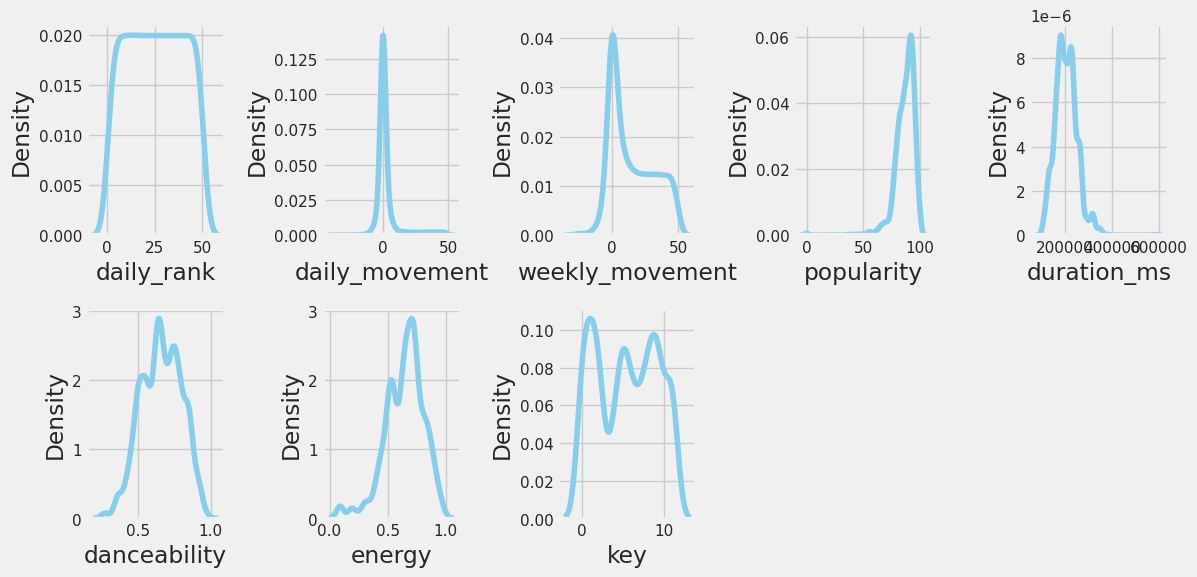

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features1 = numericals1
for i in range(0, len(features1)):
    plt.subplot(2, len(features1)//2 + 1, i+1)
    sns.kdeplot(x=filtered_df[features1[i]], color='skyblue')
    plt.xlabel(features1[i])
    plt.tight_layout()

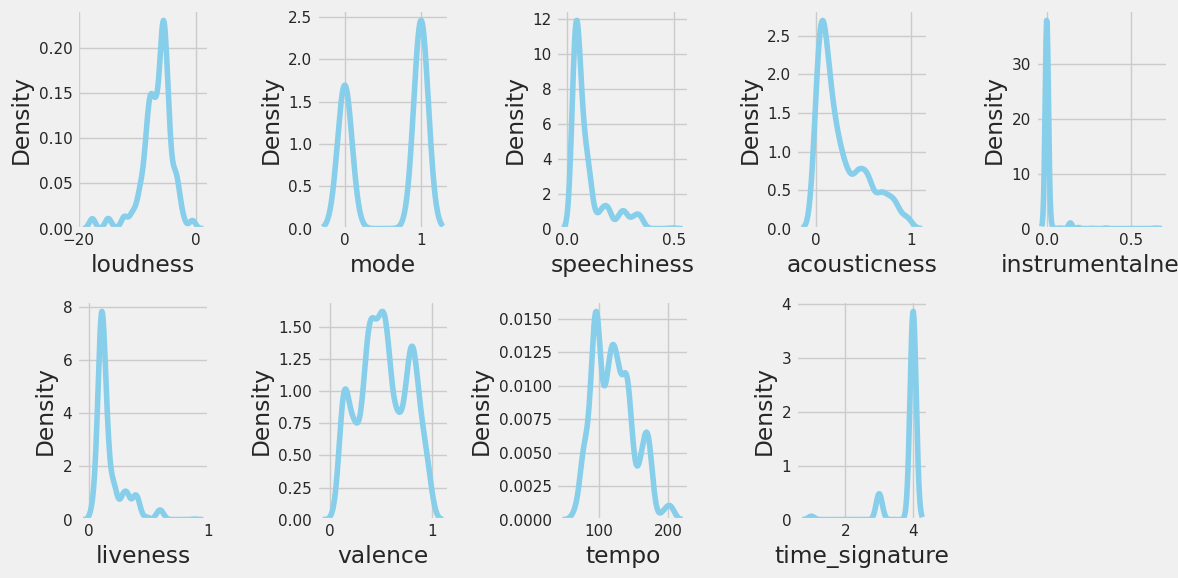

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features2 = numericals2
for i in range(0, len(features2)):
    plt.subplot(2, len(features2)//2 + 1, i+1)
    sns.kdeplot(x=filtered_df[features2[i]], color='skyblue')
    plt.xlabel(features2[i])
    plt.tight_layout()

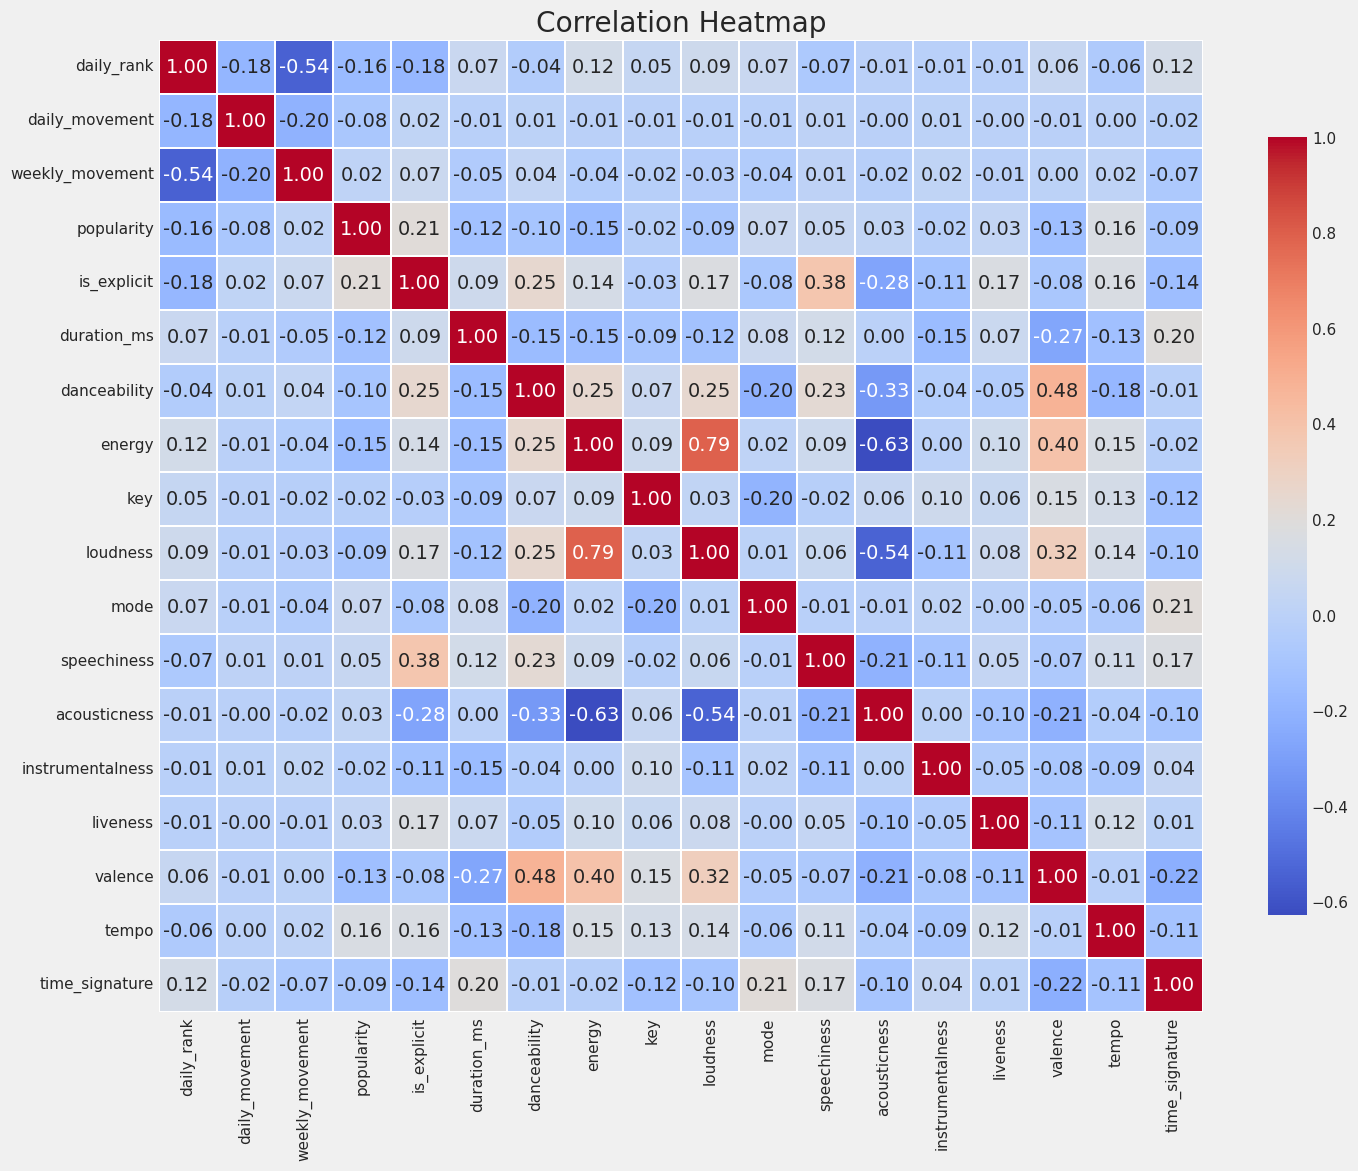

In [ ]:
# Create a correlation matrix
correlation_matrix = filtered_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.20, fmt=".2f", cbar_kws={'shrink': 0.8})

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Assume features of interest
features_of_interest = ['energy','loudness', 'danceability', 'tempo', 'valence', 'mode', 'speechiness']

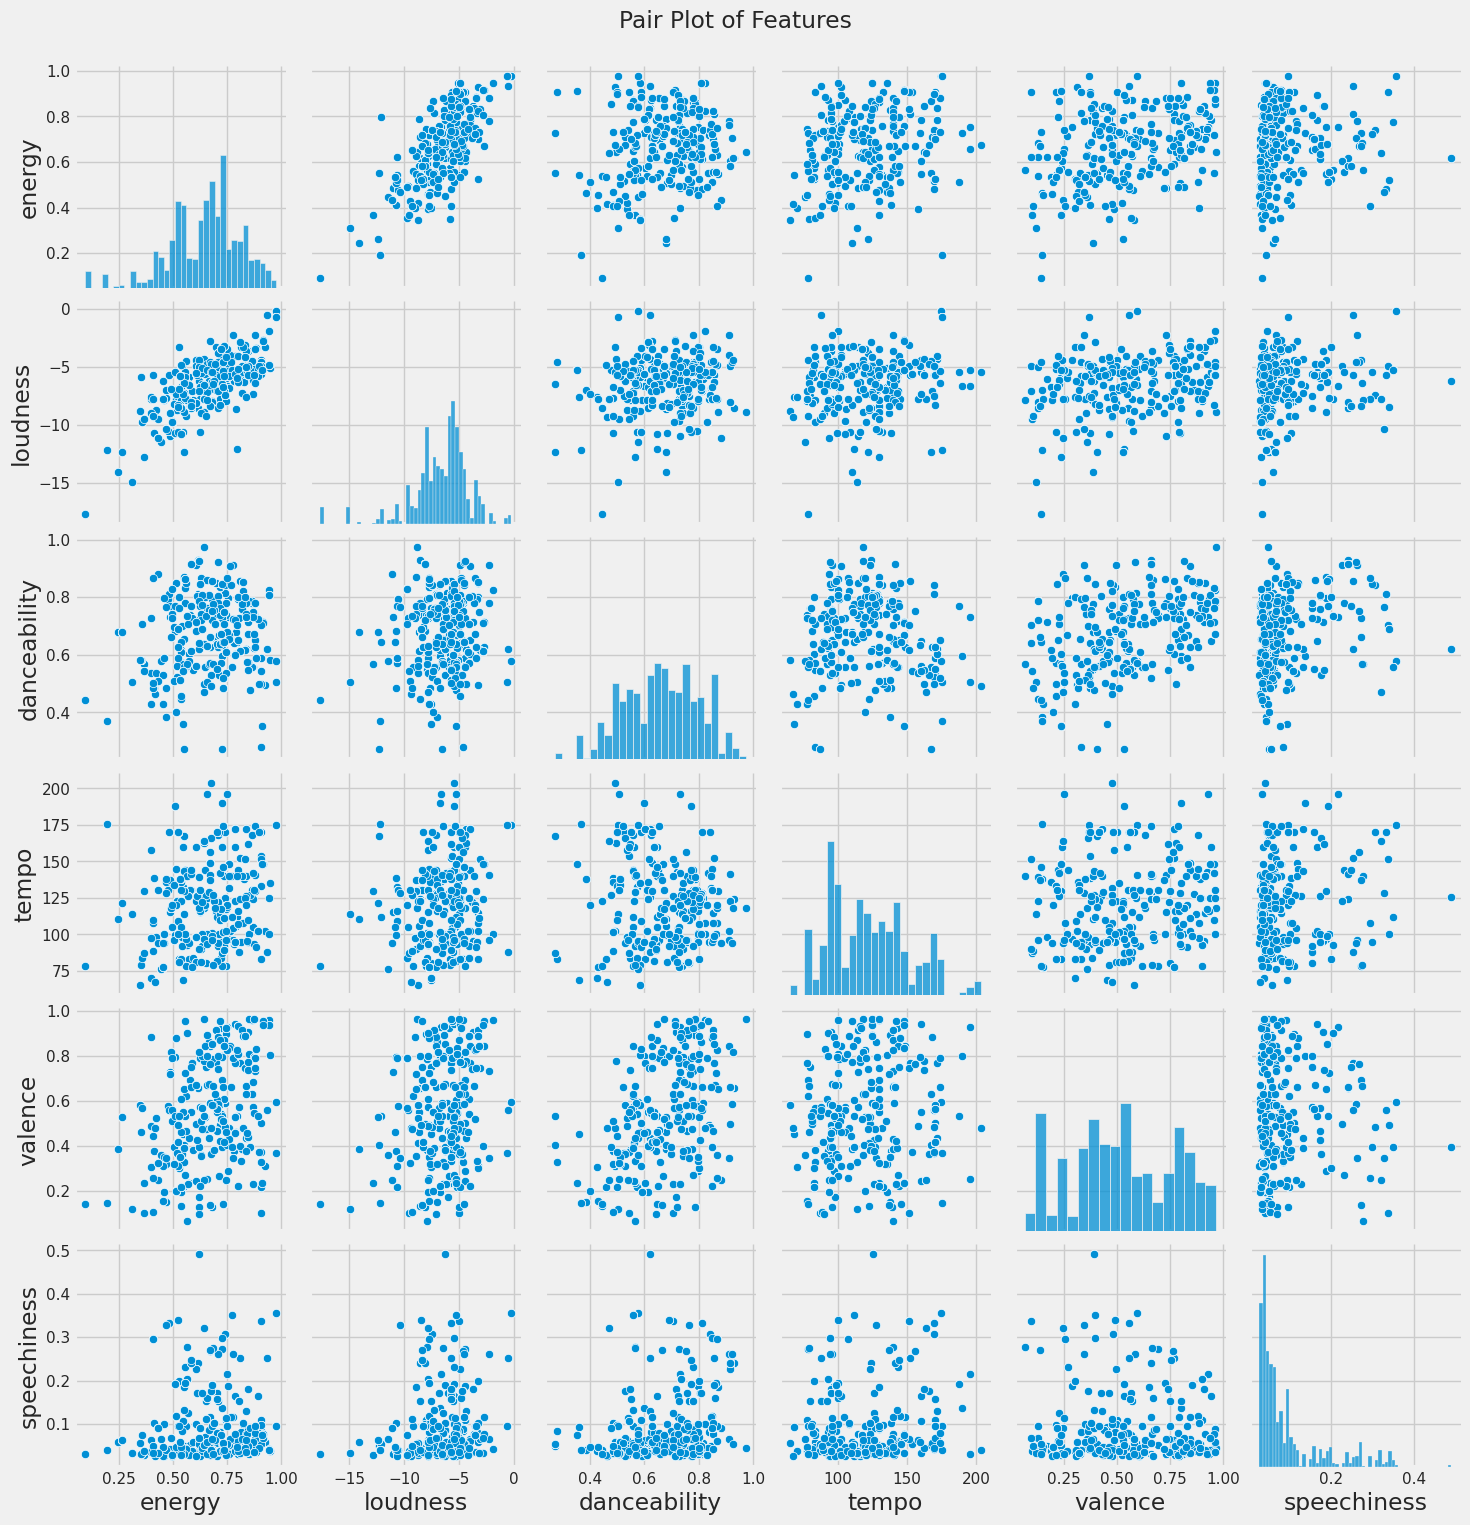

In [ ]:
# Pair plot for pairwise relationships except mode
sns.pairplot(filtered_df[['energy', 'loudness', 'danceability', 'tempo', 'valence', 'speechiness']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

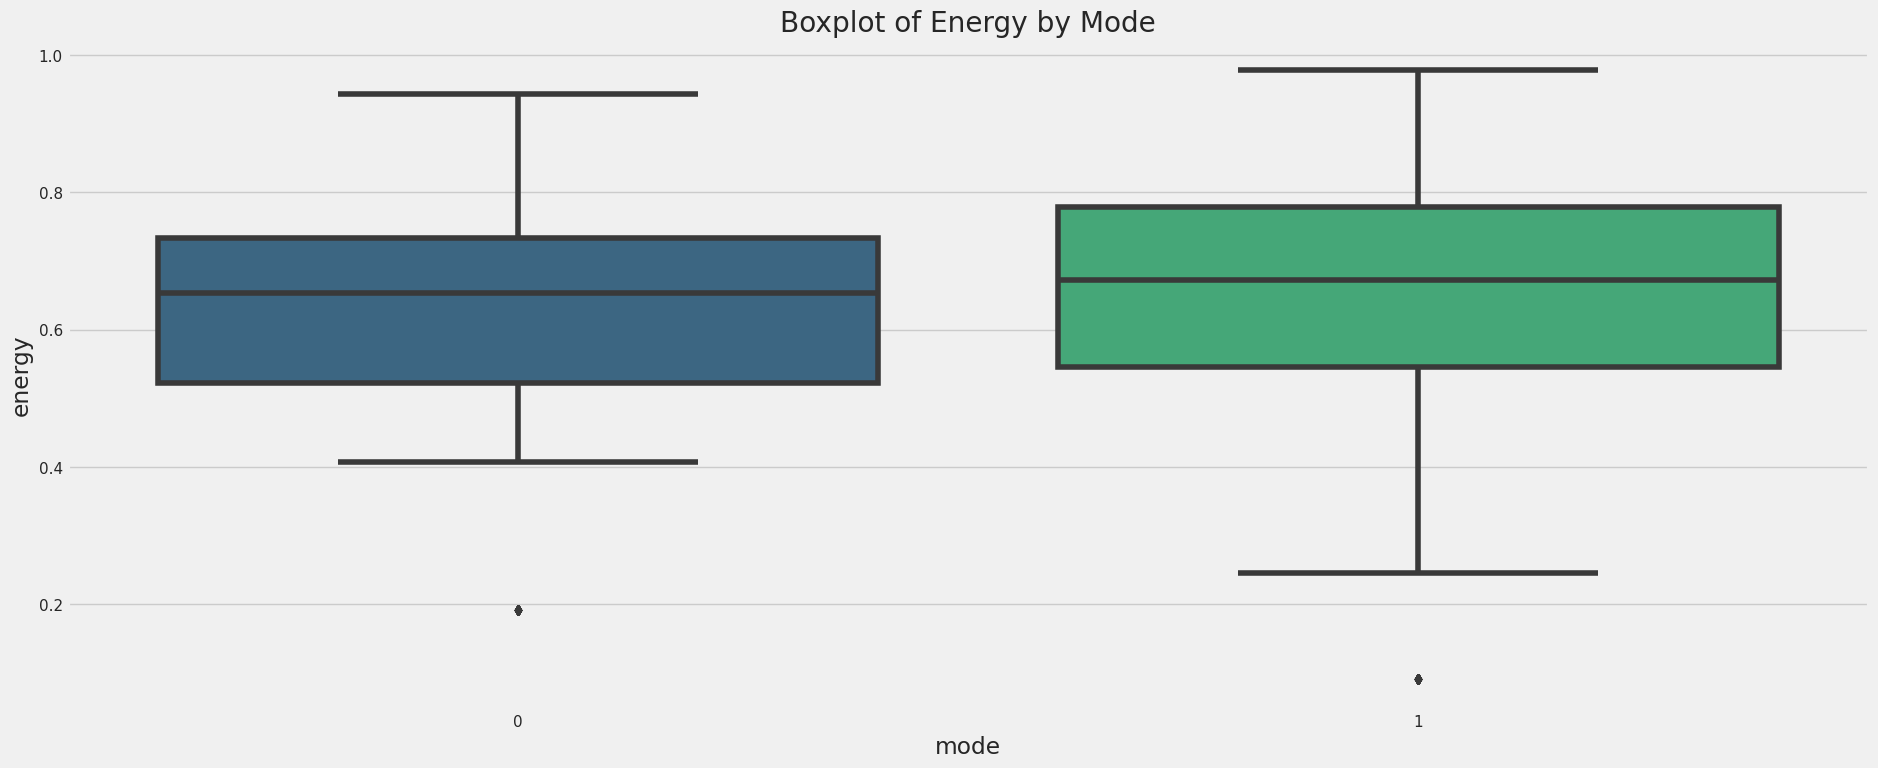

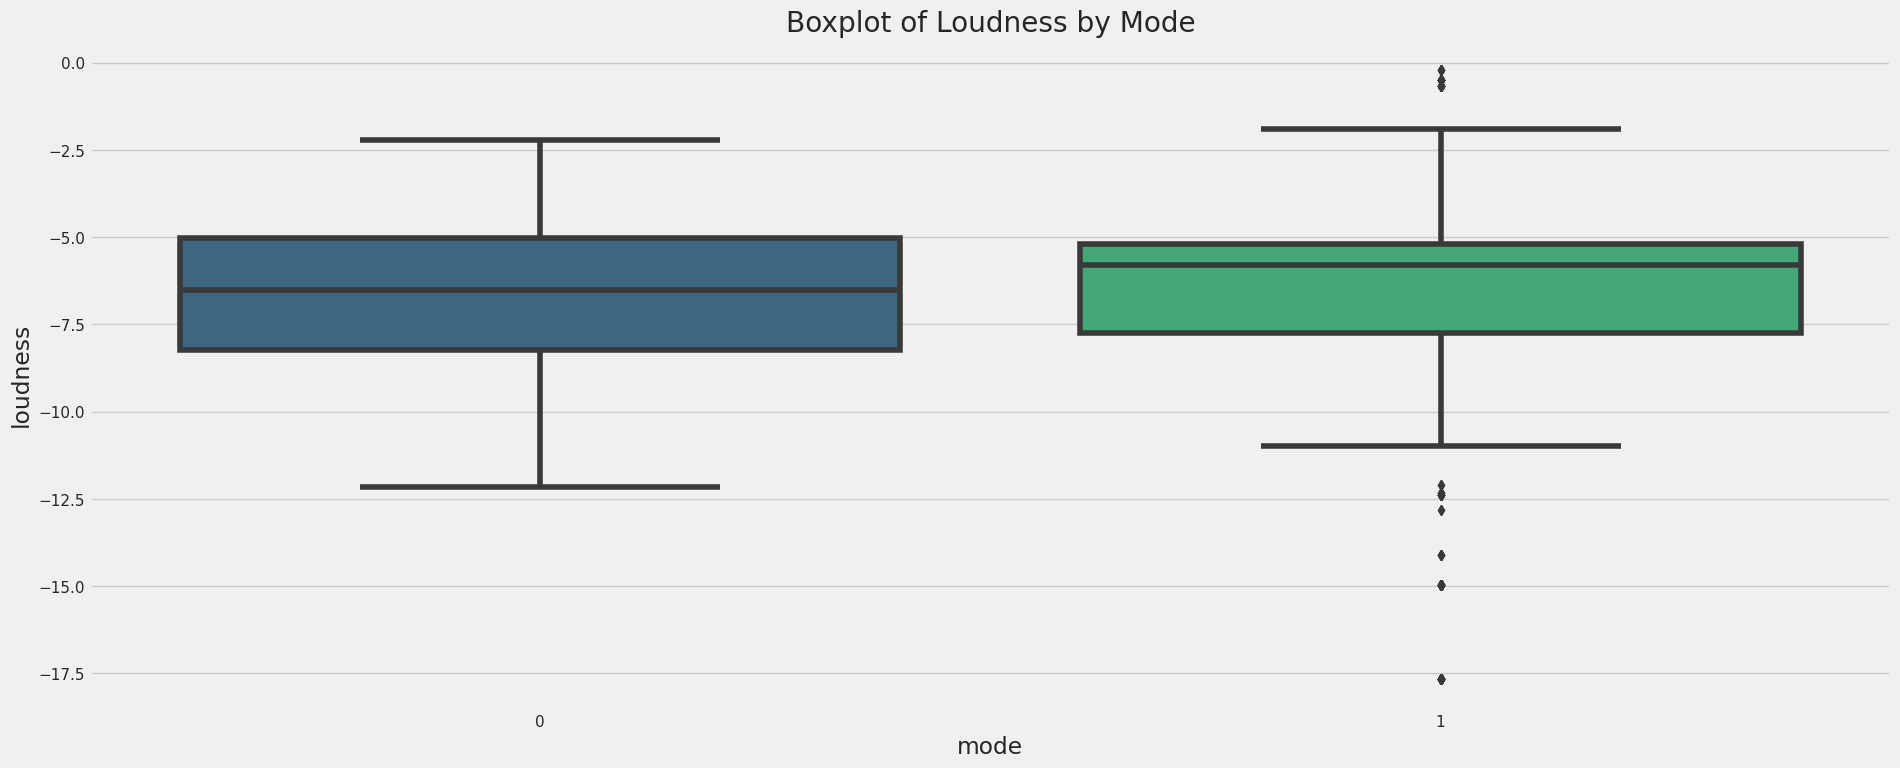

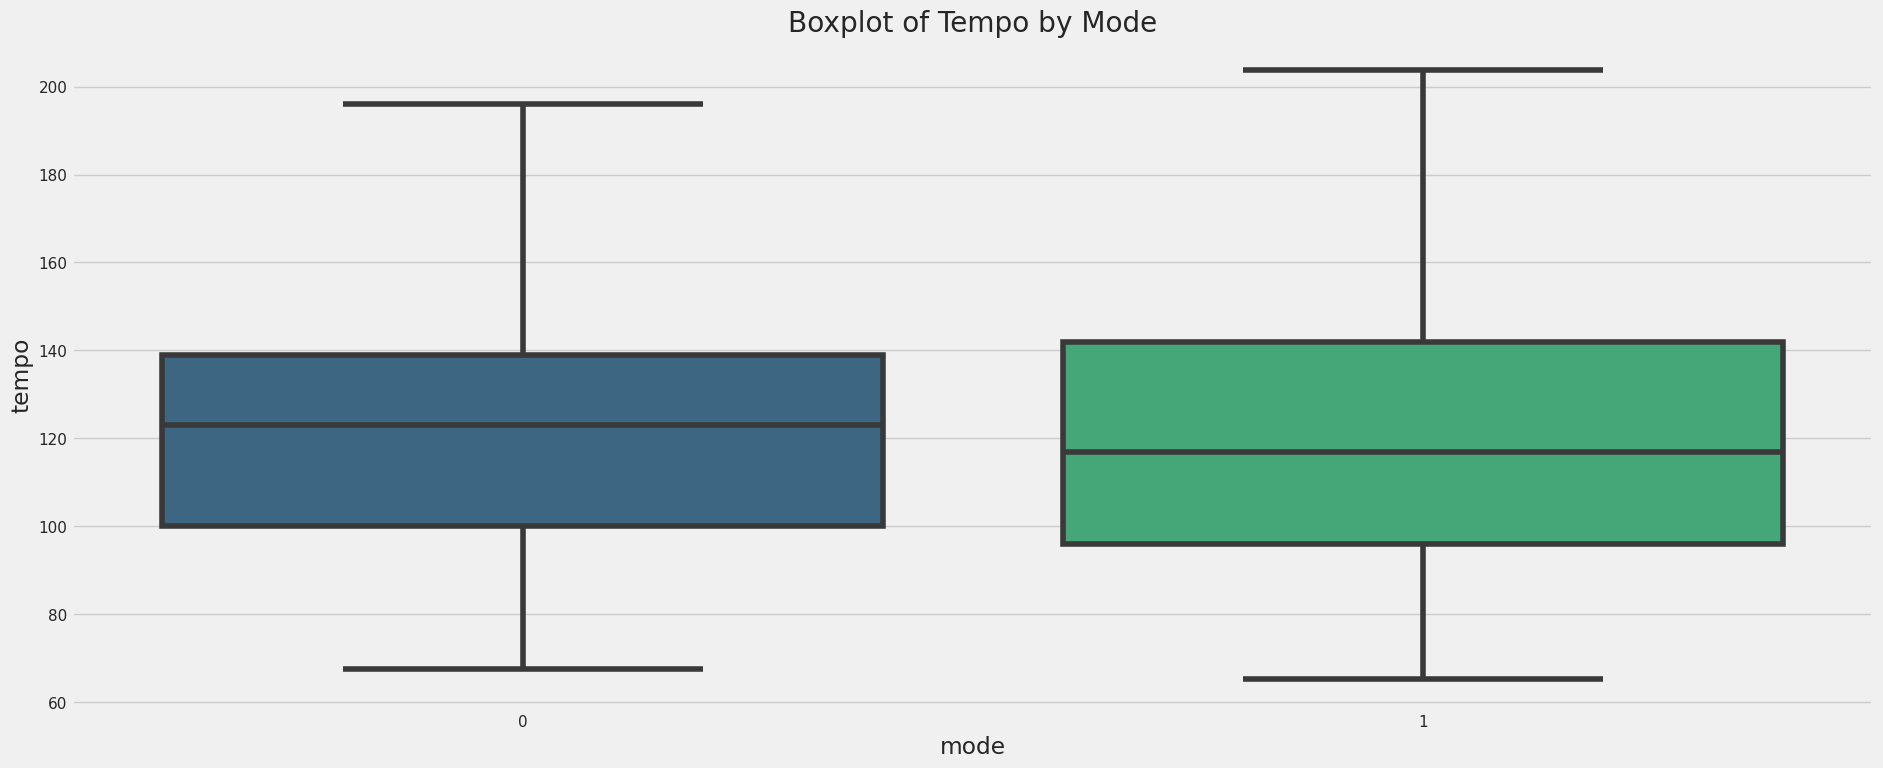

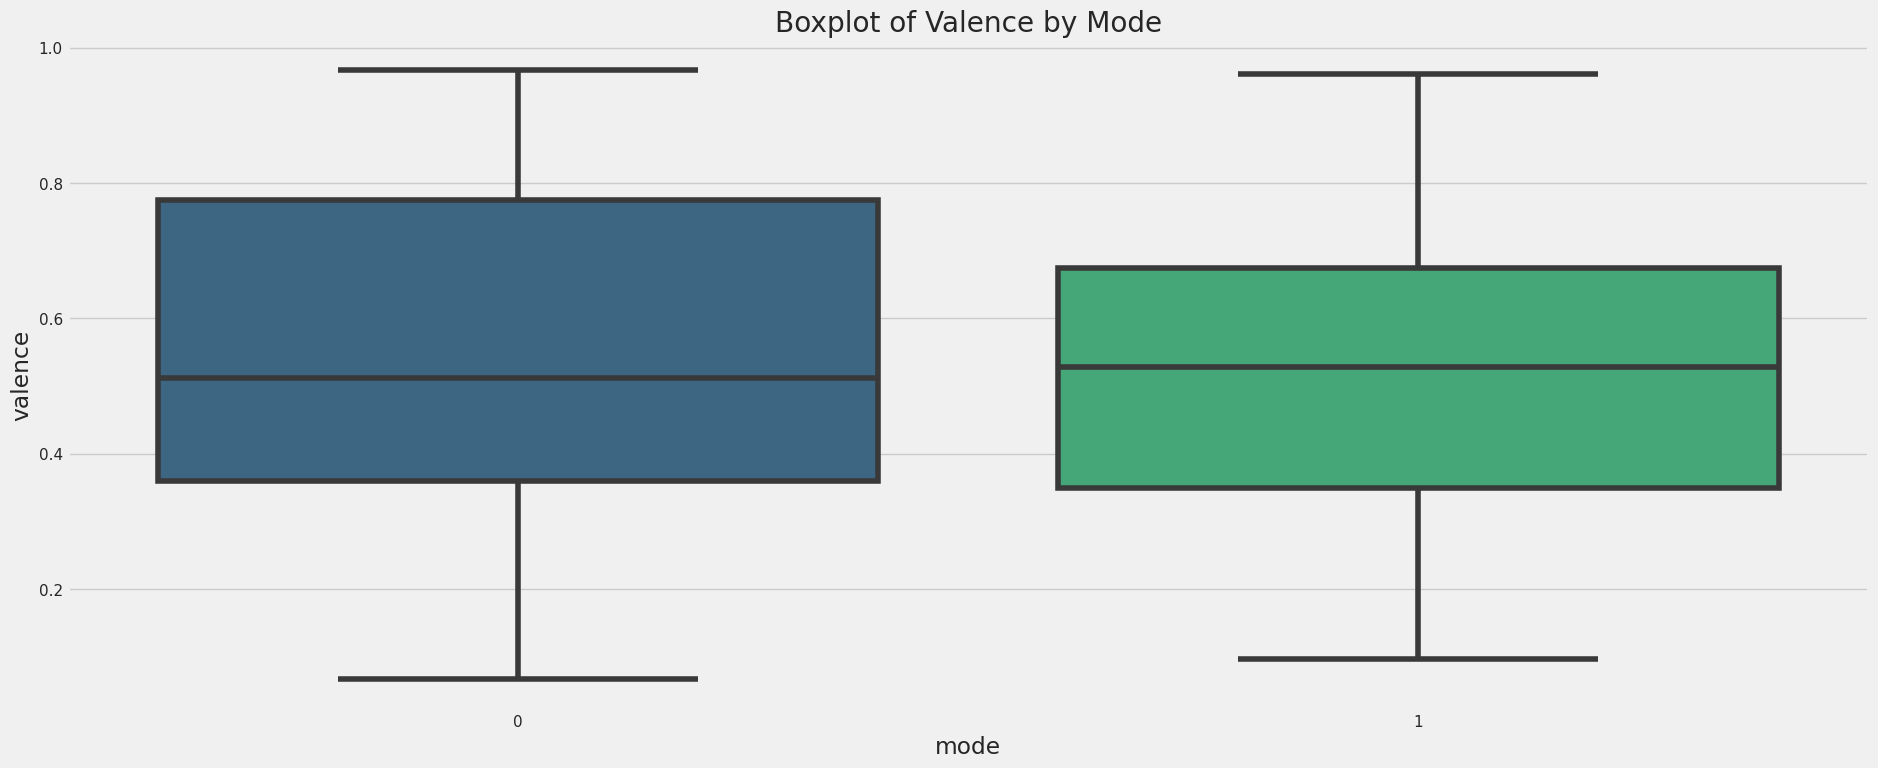

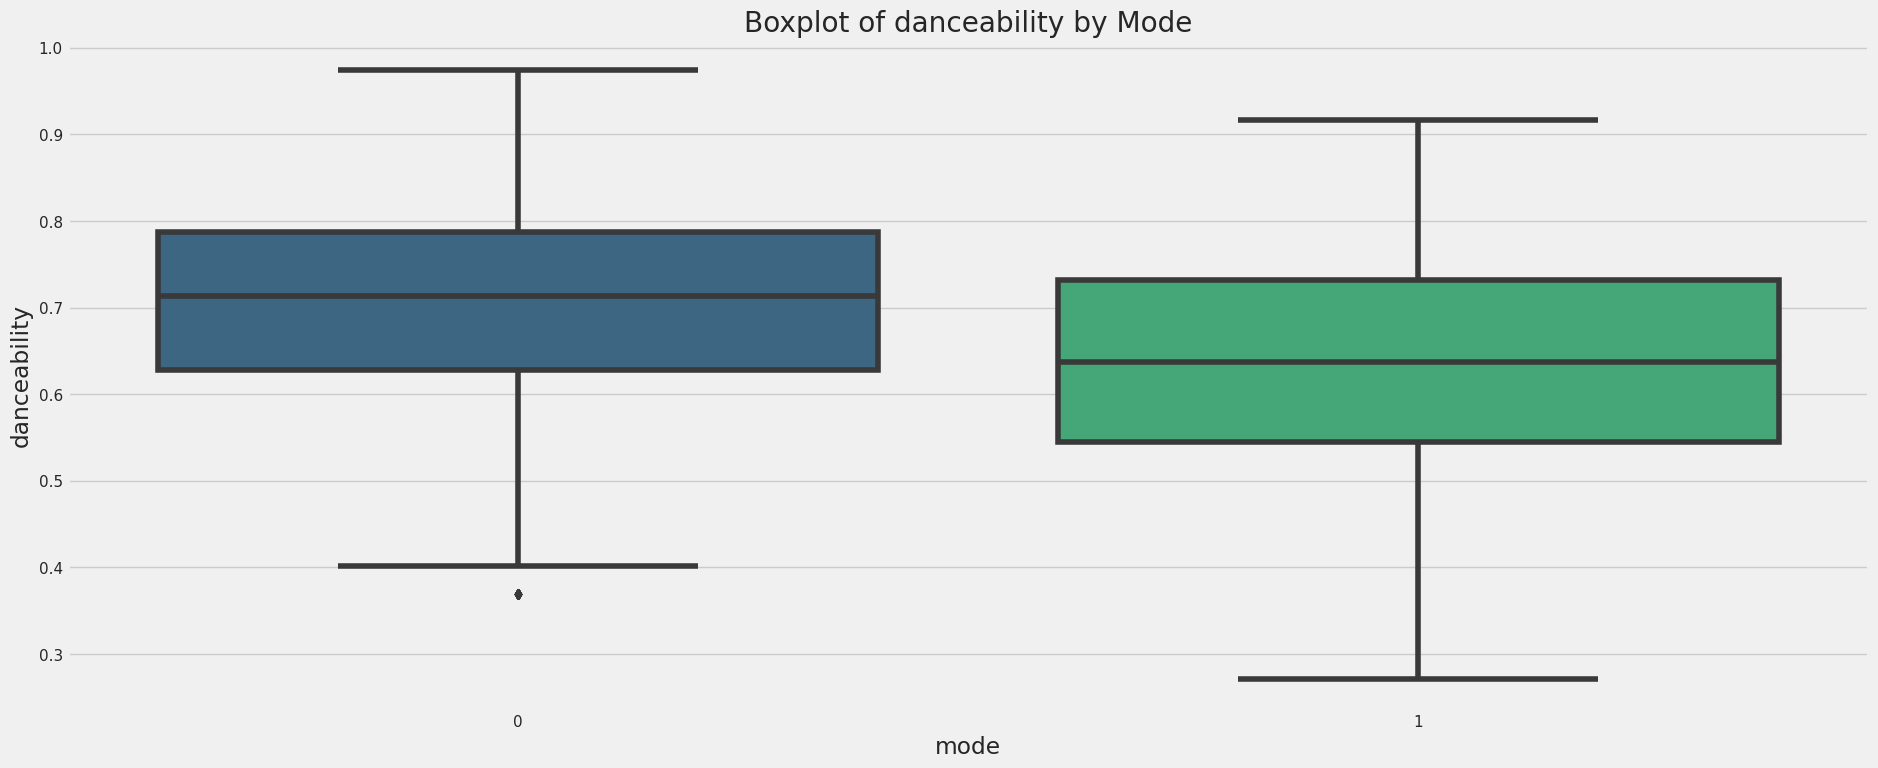

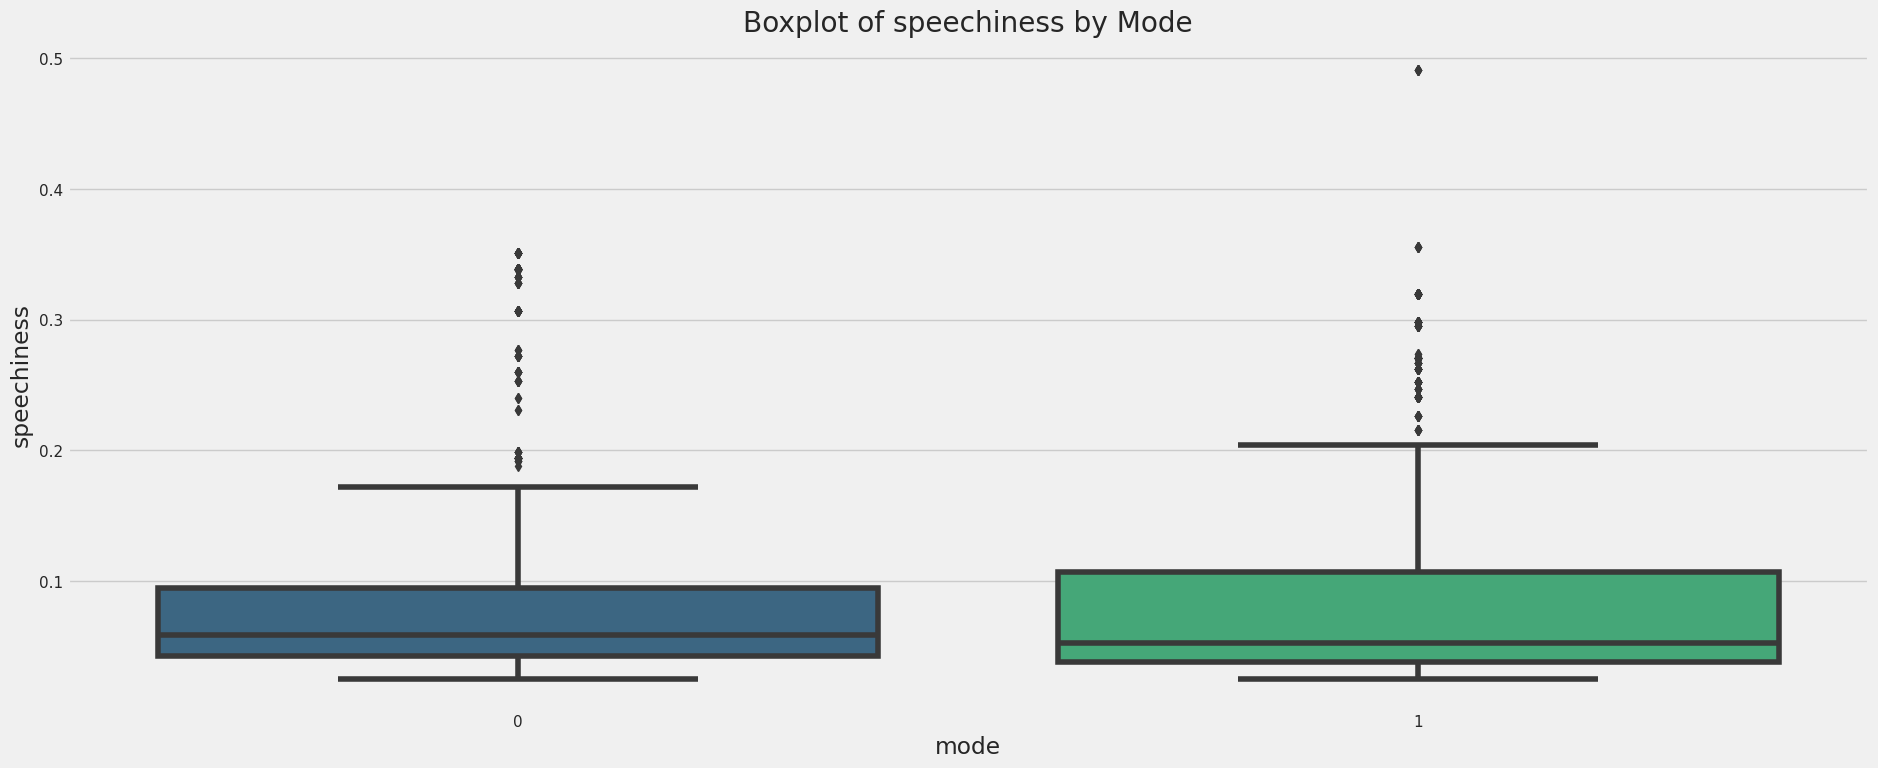

In [ ]:
# Box plot for relationship between mode and features_of_interest except mode

sns.boxplot(data=filtered_df[features_of_interest], x='mode', y='energy', palette='viridis')
plt.title('Boxplot of Energy by Mode')
plt.show()

sns.boxplot(data=filtered_df[features_of_interest], x='mode', y='loudness', palette='viridis')
plt.title('Boxplot of Loudness by Mode')
plt.show()

sns.boxplot(data=filtered_df[features_of_interest], x='mode', y='tempo', palette='viridis')
plt.title('Boxplot of Tempo by Mode')
plt.show()

sns.boxplot(data=filtered_df[features_of_interest], x='mode', y='valence', palette='viridis')
plt.title('Boxplot of Valence by Mode')
plt.show()

sns.boxplot(data=filtered_df[features_of_interest], x='mode', y='danceability', palette='viridis')
plt.title('Boxplot of danceability by Mode')
plt.show()

sns.boxplot(data=filtered_df[features_of_interest], x='mode', y='speechiness', palette='viridis')
plt.title('Boxplot of speechiness by Mode')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Select relevant columns for clustering

X = filtered_df[features_of_interest]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    inertia.append(kmeans.inertia_)

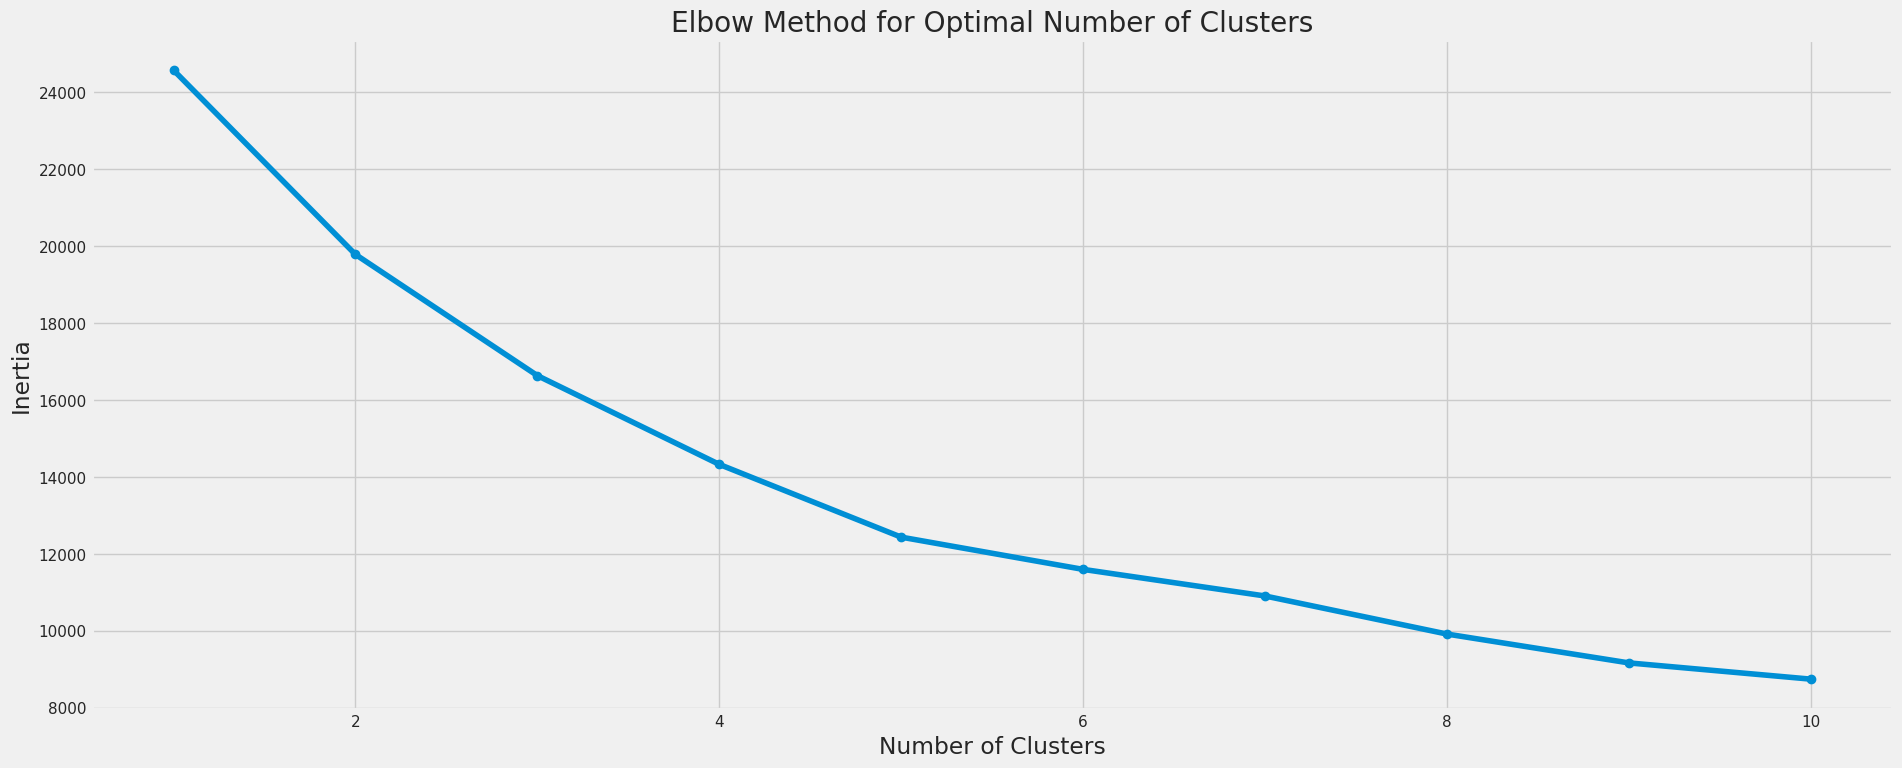

In [ ]:
# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Silhouette Score to find the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_standardized)
    silhouette_scores.append(silhouette_score(X_standardized, labels))

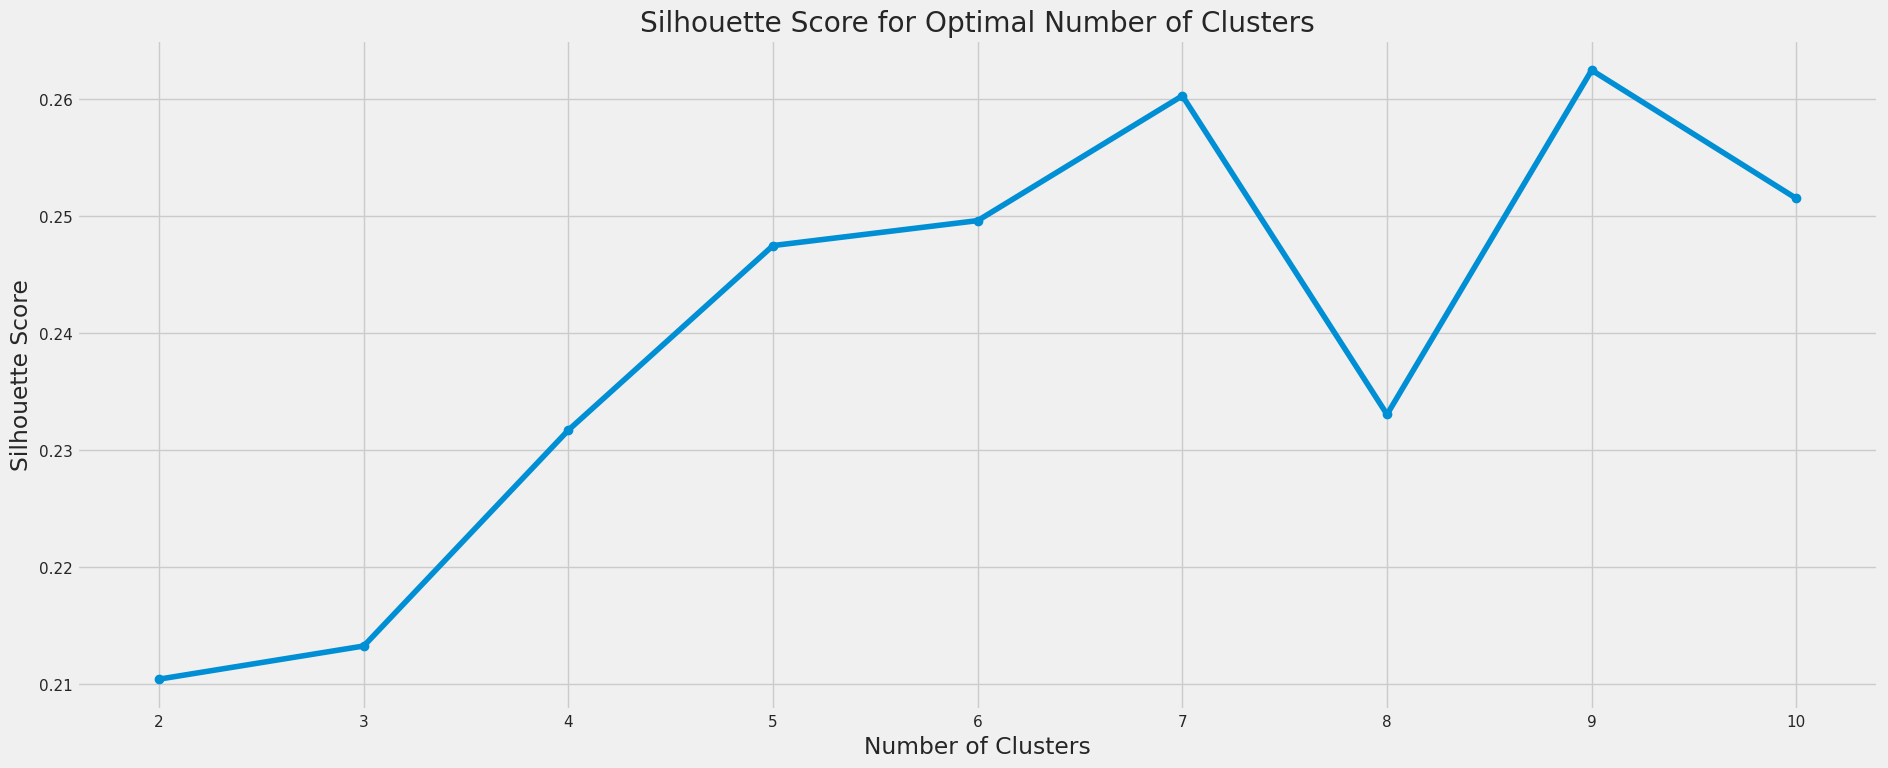

In [ ]:
#Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

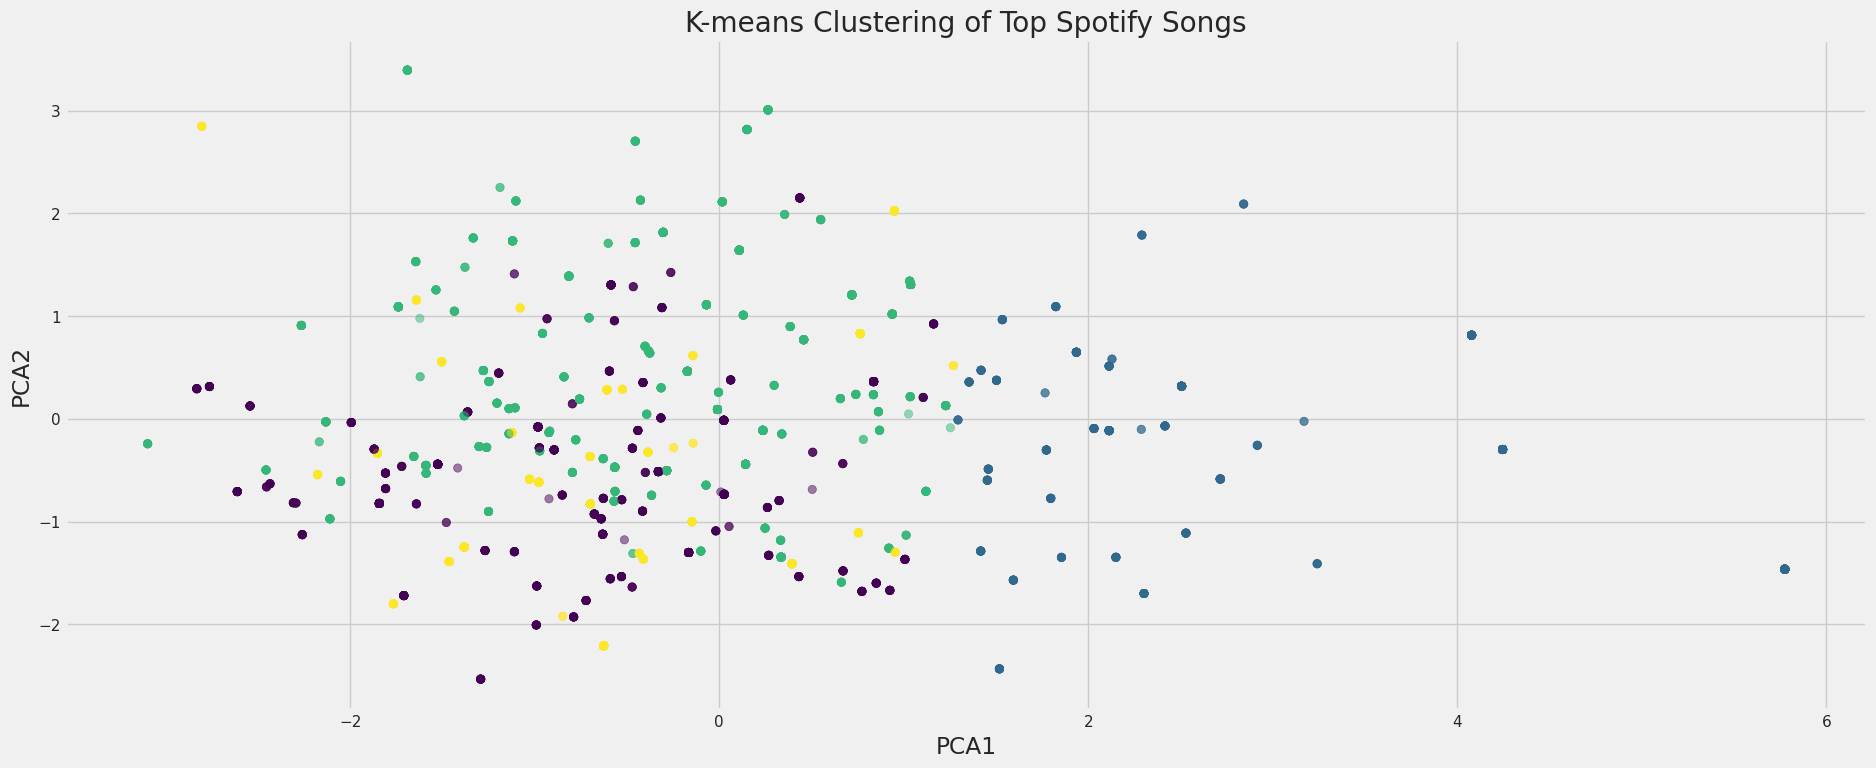

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
filtered_df['cluster'] = kmeans.fit_predict(X_standardized)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
filtered_df['PCA1'] = X_pca[:, 0]
filtered_df['PCA2'] = X_pca[:, 1]

# Plot the clusters in 2D
plt.scatter(filtered_df['PCA1'], filtered_df['PCA2'], c=filtered_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Top Spotify Songs')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


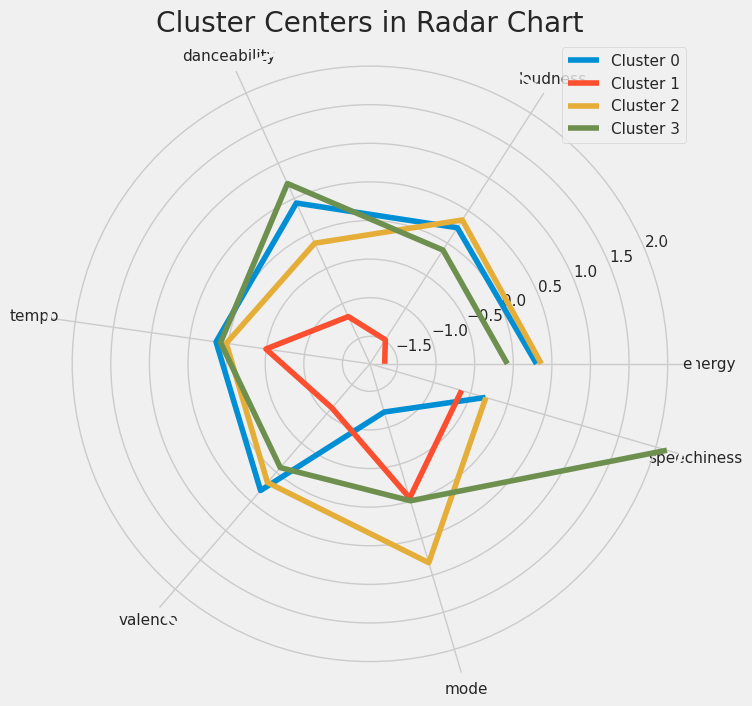

In [ ]:
 cluster_centers = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i in range(num_clusters):
    ax.plot(range(len(features_of_interest)), cluster_centers[i], label=f'Cluster {i}')
ax.set_xticks(range(len(features_of_interest)))
ax.set_xticklabels(features_of_interest)
ax.legend(loc='upper right')
plt.title('Cluster Centers in Radar Chart')
plt.show()

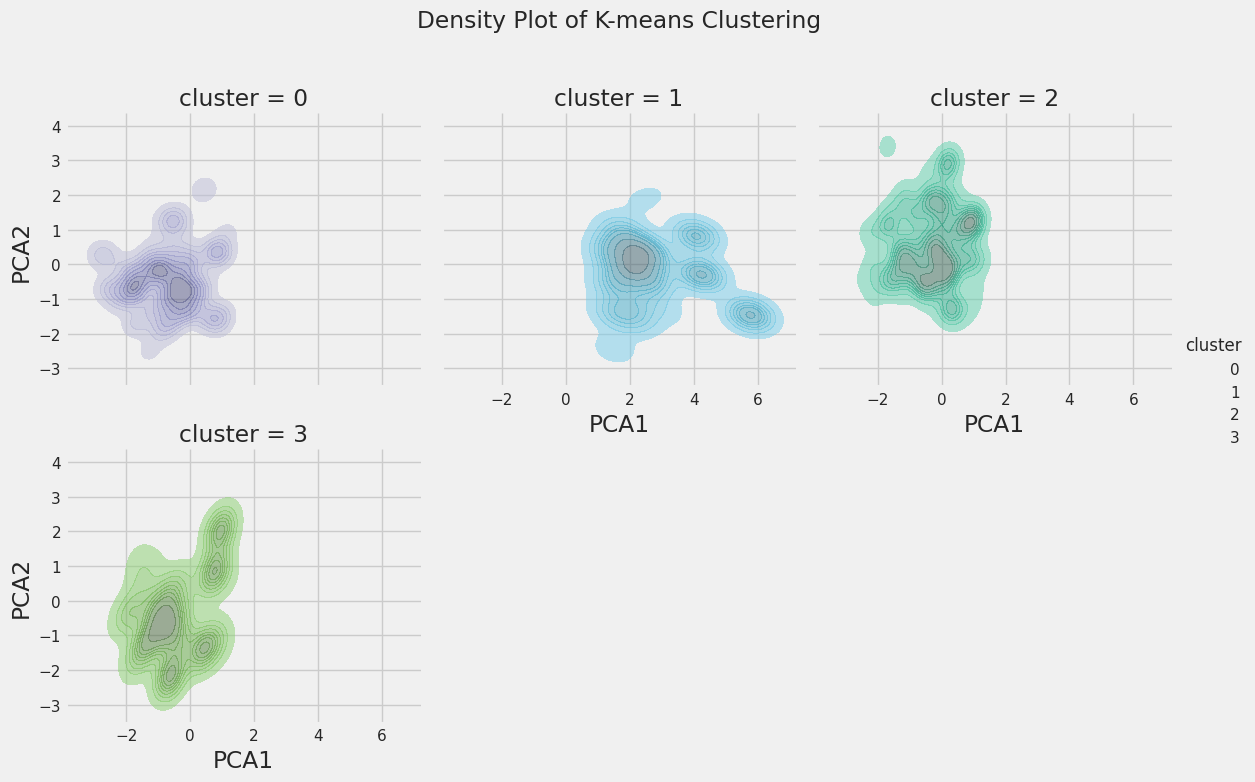

In [ ]:
import seaborn as sns

# Create a FacetGrid with a scatter plot for each cluster
g = sns.FacetGrid(filtered_df, col="cluster", hue="cluster", palette="viridis", col_wrap=3, height=4)
g.map(sns.kdeplot, "PCA1", "PCA2", alpha=0.5, fill=True)
g.add_legend()
plt.suptitle('Density Plot of K-means Clustering')
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
median_per_cluster = filtered_df.groupby('cluster')[features_of_interest].median()
print(median_per_cluster)

         energy  loudness  danceability    tempo  valence  mode  speechiness
cluster                                                                     
0         0.703   -5.6815         0.738  125.093    0.558   0.0       0.0584
1         0.417   -9.4750         0.501  109.094    0.200   1.0       0.0366
2         0.708   -5.6500         0.638  117.913    0.549   1.0       0.0527
3         0.640   -7.6830         0.802  123.061    0.494   1.0       0.2710


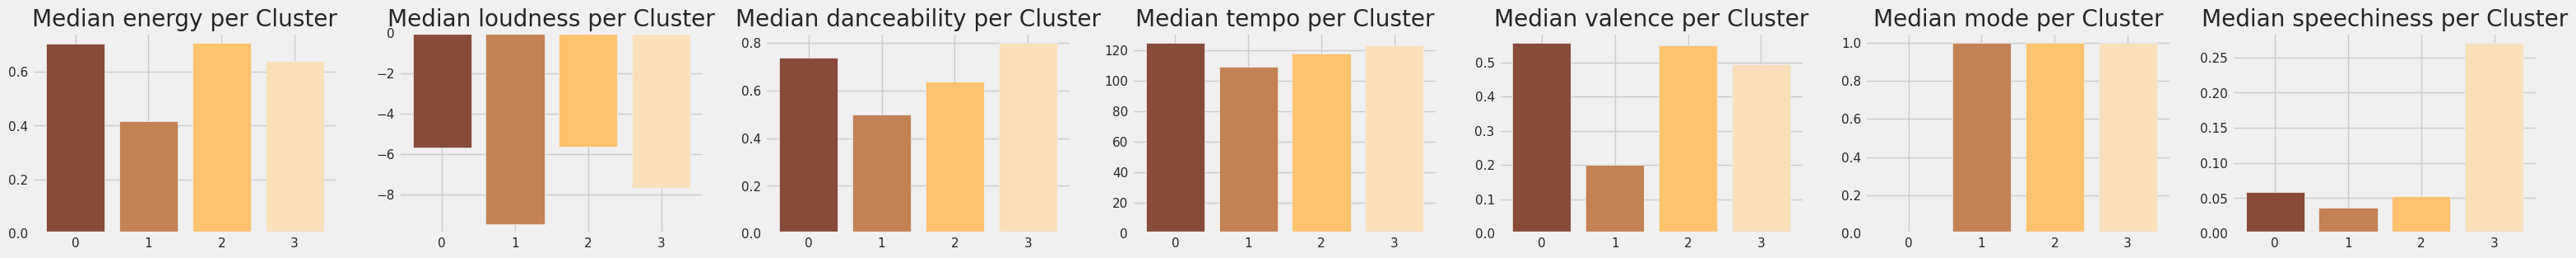

In [ ]:
# Define colors
colors = ["#884A39", "#C38154", "#FFC26F", "#F9E0BB"]

def dist_list(lst):
    plt.figure(figsize=[len(lst)*5, 3])
    i = 1
    for col in lst:
        ax = plt.subplot(1, len(lst), i)
        for idx, cluster in enumerate(median_per_cluster.index):
            ax.bar(idx, median_per_cluster.loc[cluster, col], color=colors[cluster])
        ax.set_title(f'Median {col} per Cluster')
        i += 1

# Example usage
dist_list(features_of_interest)
plt.show()

**Conclusion**

Cluster 0 (Hard Rock) -> energy is quite high, loudness is quite high, tempo is very high, valence is very high, danceability is very high , speechiness is high and mode is a minor.

Cluster 1 (Ambient Music) -> very low energy, very low loudness, low tempo, very low valence, danceability is very low, speechiness is very low and mode is a major mode.

Cluster 2 (EDM) -> very high energy, very high loudness, quite low tempo, very high valence, danceability is quite low , speechiness is quite low and mode is a major mode.

Cluster 3 (POP) -> qutie low energy, quite low loudness, quite high tempo, quite low valence, danceability is very high , speechiness is very high and mode is a major mode.


### Cluster 0 (Hard Rock)
This cluster showcases music with notably high energy, loudness, tempo, valence, and danceability, accompanied by high speechiness. It's characterized by a minor mode. These attributes are in line with the distinct features of Hard Rock. The music in this cluster exudes high energy, elevated volume, a rapid tempo, and intense emotional depth, fitting the defining traits of Hard Rock.

###Cluster 1 (Ambient Music)
This cluster embodies music with extremely low energy, minimal loudness, a slow tempo, and profoundly low valence and danceability. It also exhibits very low speechiness and follows a major mode. These attributes align with the characteristics of Ambient Music, known for its serene and atmospheric nature, often employing minimalistic tones, slow tempos, and a subdued mood.

###Cluster 2 (EDM)
The characteristics described for Cluster 3, including high energy, loudness, and valence, along with a relatively low tempo and major mode, align with the characteristics of Uplifting Trance. Uplifting Trance is a subgenre of electronic dance music known for its energetic and euphoric sound, characterized by soaring melodies and positive vibes.

###Cluster 3 (POP)
The characteristics described for Cluster 4, including low energy, low loudness, relatively high tempo, low valence, very high danceability, very high speechiness, and a major mode, are indicative of characteristics often associated with the Pop genre. Pop music typically features catchy tunes, high danceability, and lyrics that are easily understandable (high speechiness). The major mode contributes to the generally upbeat and accessible nature of Pop music.